## RTRL을 활용하여 대한민국 해안의 2021년 10월 조위 학습 - 태안, 흑산도, 울릉

조차는 달에 의한 인력과 원심가속도 크기 차이에 의한 힘이 지구의 서로 다른 반대편에서 반대방향으로의 알짜힘을 작용하며 발생한다. 태양에 의한 조석 역시 같은 메커니즘으로 발생한다. 태양에 의한 조석과 달에 의한 조석이 겹치면 그 효과가 증폭되어 더 큰 조차를 가지게 되기도 한다. 그러나 이외에도 수심(해저면과의 마찰), 해안지형 등 조차를 일으키는 요인이 많기 때문에 이를 푸리에변환 해보면 굉장히 다양한 주기와 진폭들이 합쳐진 것을 확인할 수 있으며, 우리나라 내에서도 관측소에 따라 다른 양상을 보인다. 우리나라는 서해안에서는 조차가 크게 나타나지만 동해안에서는 조차가 크지 않게 나타나는 경향이 있다. 서해에 위치한 태안과 흑산도는 tide의 주기가 명확하게 나타나는 반면(Fig.1 (a) ~ (b)), 동해에 위치한 울릉도는 경향을 알아보기가 어렵다(Fig.1 (c)). 본 과제를 통해 RTRL을 활용하여 이러한 조위 관측 데이터를 학습해보고자 한다. 바다누리 해양정보 서비스에서 2021년 10월(2021.10.01 00:00~2021.10.30 23:59)의 1분 단위의 조위 관측 데이터를 얻었다. (http://www.khoa.go.kr/oceangrid/khoa/koofs.do)

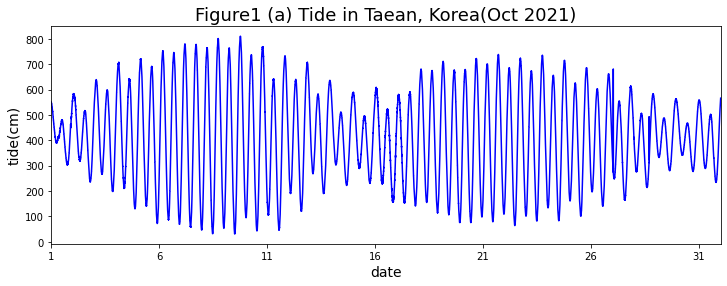

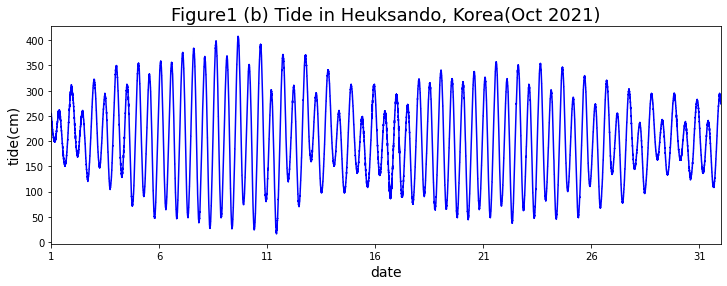

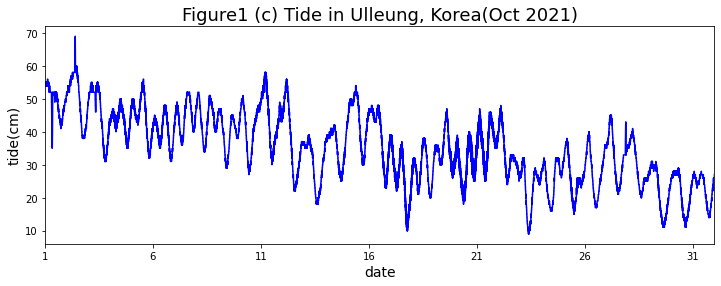

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 데이터 로딩
# 태안은 _T, 흑산도는 _H, 울릉은 _U를 약자로 사용하도록 하겠다.

## 태안
file_T = open('data_taean.txt', 'r').readlines()
file_T = file_T[4:] # 첫 4줄은 headerline이기 때문에 제외
data_T = []
tide_T = []
timenum_T = [] # time number를 도입하여 00:00을 0, 00:01을 1, 00:02을 2로 한다
for i in range(len(file_T)):
    data_T.append(file_T[i].split())
    tide_T.append(data_T[i][2])
    timenum_T.append(i)
    
# 데이터를 로딩하기는 하였지만 일부 데이터가 중간에 비어져 있는 문제가 발생하였다.
# 극히 일부의 데이터이긴 하지만 이로인해 오류가 발생할 수 있기 때문에 interpolation을 하여 채워넣는다.
for i in range(len(tide_T)):
    if tide_T[i] == '-':
        tide_T[i] = np.nan
    else:
        tide_T[i] = float(tide_T[i])
tide_T = pd.Series(tide_T)
tide_T = np.round(tide_T.interpolate(method = 'cubic').tolist(), 0)

plt.figure(figsize = (12, 4))
ax = plt.gca()
ax.set_facecolor('w')
plt.plot(timenum_T, tide_T, c = 'b')
plt.xlim(0, len(file_T))
plt.xticks(np.arange(0, len(file_T), 5*24*60), labels = ['1', '6', '11', '16', '21', '26', '31'])
plt.xlabel('date', fontsize = 14)
plt.ylabel('tide(cm)', fontsize = 14)
plt.title('Figure1 (a) Tide in Taean, Korea(Oct 2021)', fontsize = 18)
plt.show()


## 흑산도
file_H = open('data_heuksando.txt', 'r').readlines()
file_H = file_H[4:] # 첫 4줄은 headerline이기 때문에 제외
data_H = []
tide_H = []
timenum_H = [] # time number를 도입하여 00:00을 0, 00:01을 1, 00:02을 2로 한다
for i in range(len(file_H)):
    data_H.append(file_H[i].split())
    tide_H.append(data_H[i][2])
    timenum_H.append(i)
    
# 마찬가지로 interpolation을 하여 채워넣는다.
for i in range(len(tide_H)):
    if tide_H[i] == '-':
        tide_H[i] = np.nan
    else:
        tide_H[i] = float(tide_H[i])
tide_H = pd.Series(tide_H)
tide_H = np.round(tide_H.interpolate(method = 'cubic').tolist(), 0)

plt.figure(figsize = (12, 4))
ax = plt.gca()
ax.set_facecolor('w')
plt.plot(timenum_H, tide_H, c = 'b')
plt.xlim(0, len(file_H))
plt.xticks(np.arange(0, len(file_H), 5*24*60), labels = ['1', '6', '11', '16', '21', '26', '31'])
plt.xlabel('date', fontsize = 14)
plt.ylabel('tide(cm)', fontsize = 14)
plt.title('Figure1 (b) Tide in Heuksando, Korea(Oct 2021)', fontsize = 18)
plt.show()

## 울릉
file_U = open('data_ulleung.txt', 'r').readlines()
file_U = file_U[4:] # 첫 4줄은 headerline이기 때문에 제외
data_U = []
tide_U = []
timenum_U = [] # time number를 도입하여 00:00을 0, 00:01을 1, 00:02을 2로 한다
for i in range(len(file_U)):
    data_U.append(file_U[i].split())
    tide_U.append(data_U[i][2])
    timenum_U.append(i)
    
# 마찬가지로 interpolation을 하여 채워넣는다.
for i in range(len(tide_U)):
    if tide_U[i] == '-':
        tide_U[i] = np.nan
    else:
        tide_U[i] = float(tide_U[i])
tide_U = pd.Series(tide_U)
tide_U = np.round(tide_U.interpolate(method = 'cubic').tolist(), 0)

plt.figure(figsize = (12, 4))
ax = plt.gca()
ax.set_facecolor('w')
plt.plot(timenum_U, tide_U, c = 'b')
plt.xlim(0, len(file_U))
plt.xticks(np.arange(0, len(file_U), 5*24*60), labels = ['1', '6', '11', '16', '21', '26', '31'])
plt.xlabel('date', fontsize = 14)
plt.ylabel('tide(cm)', fontsize = 14)
plt.title('Figure1 (c) Tide in Ulleung, Korea(Oct 2021)', fontsize = 18)
plt.show()

In [2]:
## 데이터 정제
# 조위 데이터들을 0에서 1사이의 값을 가지도록 정제한다.
from sklearn.preprocessing import minmax_scale

tide_T2 = minmax_scale(tide_T)
tide_H2 = minmax_scale(tide_H)
tide_U2 = minmax_scale(tide_U)
#print(tide_T2)
#print(len(tide_T2))

위에서 정제한 데이터를 토대로 아래와 같이 RTRL을 구현해보았다(Fig.2). learning rate를 바꾸어가며 진행해보았는데, learning rate가 너무 작으면(lr = 0.1, 0.01) 조석의 진폭을 제대로 따라가지 못하는 문제가 발생하였으며, learning rate가 너무 크면(lr > 20) 너무 과도하게 b와 w가 조절되어 수평 직선 모양이 생기는 문제가 발생하였다. 아래의 코드는 learning rate를 5로 한 것 기준이다. 

Taean
0.5 0.668806161745828
0.3332506662745558 0.32477535301668803
0.4841713119181922 0.4942233632862644
0.6950267618707389 0.6842105263157895
0.2143619044602854 0.220795892169448
0.6174409728465201 0.6225930680359435
0.6561703034657151 0.6508344030808729
0.07378355132516116 0.06290115532734275
0.8170465021420155 0.8202824133504493
0.27329738198030773 0.2631578947368421
0.5948295249063646 0.5994865211810013
0.5978745048208095 0.5969191270860077


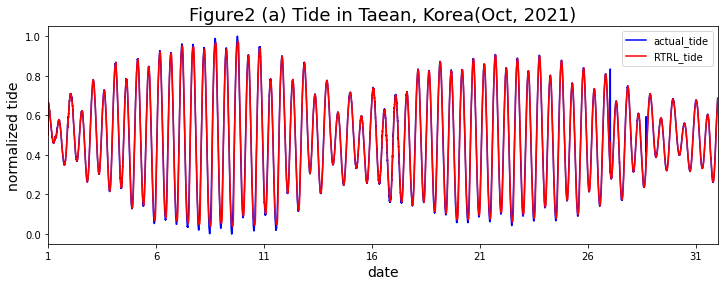

Heuksando
0.5 0.6096938775510203
0.2692966338421371 0.2704081632653061
0.8502549108202362 0.857142857142857
0.12868897783814442 0.09693877551020408
0.4995461661141203 0.510204081632653
0.7560357652311247 0.7551020408163264
0.28826021087680787 0.2755102040816326
0.4314847882758781 0.44387755102040816
0.536702356613902 0.5255102040816325
0.30166511858245226 0.3112244897959183
0.704661116974468 0.7066326530612244
0.3861154313854043 0.37755102040816324


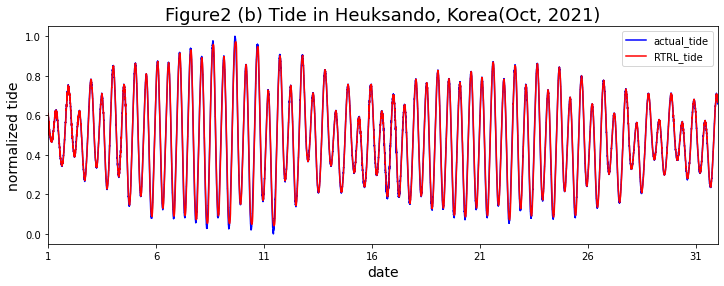

Ulleung
0.5 0.75
0.3702813461206208 0.3833333333333333
0.6434587711071539 0.6333333333333333
0.4176478786733479 0.41666666666666663
0.6997896889358343 0.7
0.4166926407428761 0.41666666666666663
0.24201672008210293 0.2333333333333333
0.20330082634077304 0.2333333333333333
0.3184110249757027 0.30000000000000004
0.3166451817391039 0.31666666666666665
0.2794178945423168 0.2833333333333333
0.23805253850336933 0.2333333333333333


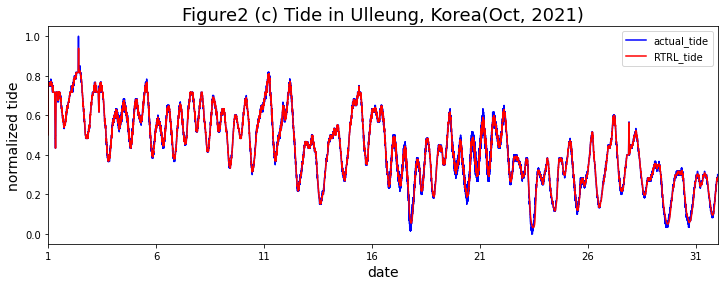

In [10]:
## RTRL 구현
# 교수님 수업 자료 참고

def sigmoid(x):
    return 1./(1. + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1. - sigmoid(x))

all_tide_data = tide_T2, tide_H2, tide_U2 # 태안, 흑산도, 울릉에 대한 데이터
locations = 'Taean', 'Heuksando', 'Ulleung'
plot_alphabet = '(a)', '(b)', '(c)'
for data in range(len(all_tide_data)):
    print(locations[data])
    tide_data = all_tide_data[data]
    lr = 5
    epoch_num = len(tide_data) - 1
    
    w, b = 0., 0.
    y = tide_data[0]
    y_RTRL = [y]

    y_true = tide_data[0] 
    dydb, dydw = 0., 0.

    for epoch in range(epoch_num):
        s = y*w +b
        next_y = sigmoid(s)
        next_dydb = sigmoid_prime(s) * (1. + w*dydb )
        next_dydw = sigmoid_prime(s) * (y + w*dydw ) 
    
        b = b - lr * (next_y - y_true) * next_dydb
        w = w - lr * (next_y - y_true) * next_dydw
        y_RTRL.append(y)
    
        if epoch % 4000 ==0:
            print(next_y, y_true)
        
        next_y_true = tide_data[epoch+1]
        y = next_y
        dydb = next_dydb
        dydw = next_dydw
        y_true = next_y_true
    
    plt.figure(figsize = (12, 4))
    ax = plt.gca()
    ax.set_facecolor('w')
    plt.plot(timenum_T, tide_data, c = 'b')
    plt.plot(timenum_T, y_RTRL, c = 'r')
    plt.legend(['actual_tide', 'RTRL_tide'])
    plt.xlim(0, len(file_U))
    plt.xticks(np.arange(0, len(file_U), 5*24*60), labels = ['1', '6', '11', '16', '21', '26', '31'])
    plt.xlabel('date', fontsize = 14)
    plt.ylabel('normalized tide', fontsize = 14)
    title = 'Figure2 ' + plot_alphabet[data] + ' Tide in ' + locations[data] + ', Korea(Oct, 2021)'
    plt.title(title, fontsize = 18)
    plt.show()

learning rate가 달라짐에 따라 얼마나 RTRL이 잘 학습하는지 비교하기 위하여 sum of squares for error을 기준으로 오차를 비교하였다(Fig. 3). 사용한 learning rate는 아래의 lrs의 수들이다. 그 결과, 대략적으로 1~20 사이의 값을 이용하면 좋은 결과를 얻을 수 있었다. 다만 울릉의 경우 다른 관측소와 다르게 learning rate가 18일 때부터 오차가 커지기 시작하였는데(Fig. 3 (c)), 이는 울릉의 데이터가 다른 관측소의 데이터보다 불규칙적이고 피크값들의 크기가 작기 때문이라 추측한다. 

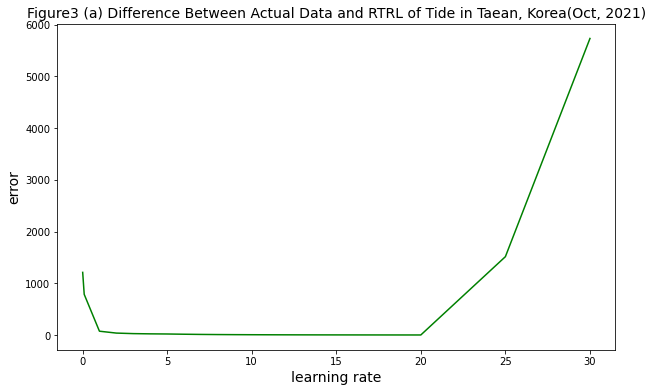

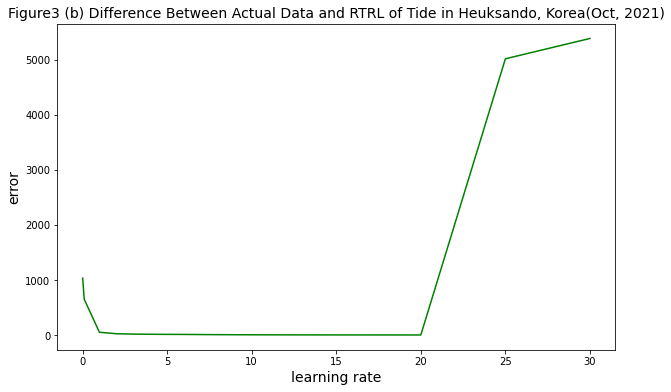

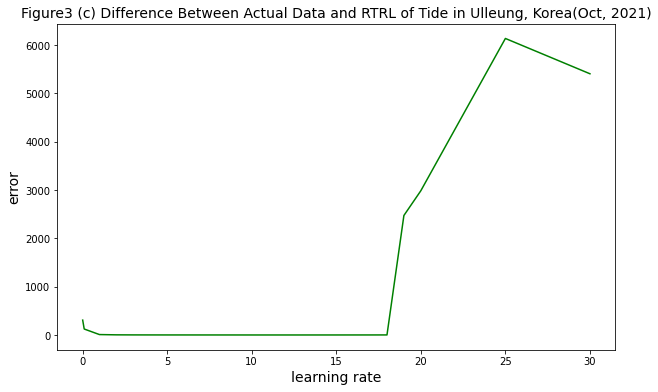

In [31]:
## Learning rate에 따른 비교

lrs = 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,\
11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30

# sum of squares for error을 기준으로 오차 비교 
def sum_squares_error(y, true_y):
    return 0.5 * np.sum((y-true_y)**2)

# 관측소별, learning rate에 따른 오차 비교
all_tide_data = tide_T2, tide_H2, tide_U2 # 태안, 흑산도, 울릉에 대한 데이터
locations = 'Taean', 'Heuksando', 'Ulleung'

error_lr_T, error_lr_H, error_lr_U = [], [], []
error_lr = [error_lr_T, error_lr_H, error_lr_U]

for data in range(len(all_tide_data)):
    tide_data = all_tide_data[data]
    epoch_num = len(tide_data) - 1
    
    w, b = 0., 0.
    y = tide_data[0]
    y_RTRL = [y]

    y_true = tide_data[0] 
    dydb, dydw = 0., 0.
    
    errors = error_lr[data]
    for i in range(len(lrs)):
        lr = lrs[i]
        for epoch in range(epoch_num):
            s = y*w +b
            next_y = sigmoid(s)
            next_dydb = sigmoid_prime(s) * (1. + w*dydb )
            next_dydw = sigmoid_prime(s) * (y + w*dydw ) 
    
            b = b - lr * (next_y - y_true) * next_dydb
            w = w - lr * (next_y - y_true) * next_dydw
            y_RTRL.append(y)
        
            next_y_true = tide_data[epoch+1]
            y = next_y
            dydb = next_dydb
            dydw = next_dydw
            y_true = next_y_true
        
        # 오차 측정
        error = sum_squares_error(y_RTRL, tide_data)
        errors.append(error)
        y_RTRL = [tide_data[0]]
        
    plt.figure(figsize = (10, 6))
    ax = plt.gca()
    ax.set_facecolor('w')
    plt.plot(lrs, errors, c = 'g')
    plt.xlabel('learning rate', fontsize = 14)
    plt.ylabel('error', fontsize = 14)
    title = 'Figure3 ' + plot_alphabet[data] + ' Difference Between Actual Data and RTRL of Tide in ' + locations[data] + ', Korea(Oct, 2021)'
    plt.title(title, fontsize = 14)
    plt.show()